In [20]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [2]:
train_df =pd.read_csv("/home/suhedata/Desktop/data/train.csv")
test_df = pd.read_csv("/home/suhedata/Desktop/data/test.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df = train_df.append(test_df,ignore_index=False).reset_index()


/tmp/ipykernel_392414/2550015375.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train_df.append(test_df,ignore_index=False).reset_index()


In [6]:
df.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df = df.drop("index", axis=1)


In [15]:
#Görev1 : Keşifci Veri Analizi

def  check_df(dataframe):
    print("****** Shape *******")
    print(dataframe.shape)
    print("****** Types *******")
    print(dataframe.dtypes)
    print("****** Head *******")
    print(dataframe.head())
    print("****** Tail *******")
    print(dataframe.tail())
    print("****** Na *******")
    print(dataframe.isnull().sum())
    print("****** Quantiles *******")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [14]:
check_df(df)

****** Shape ******* (2919, 81)
(2919, 81)
****** Types *******
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object
****** Head *******
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1       

In [56]:
#Numerik ve Kategorik Verilerin Yaklanması

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    grab_col_names for given dataframe

    :param dataframe:
    :param cat_th:
    :param car_th:
    :return:
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols

cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 2919
Variables: 92
cat_cols: 49
num_cols: 43
cat_but_car: 0
num_but_cat: 15


In [21]:

# Sayısal ve kategorik değişkenleri ayıralım
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()



# Değişken sayılarını bildirelim
num_numeric_degiskenler = len(num_cols)
num_categorical_degiskenler = len(cat_cols)

print("\nSayısal Değişkenler:")
print(num_cols)
print(f"Toplam Sayısal Değişken Sayısı: {num_numeric_degiskenler}")

print("\nKategorik Değişkenler:")
print(cat_cols)
print(f"Toplam Kategorik Değişken Sayısı: {num_categorical_degiskenler}")


Sayısal Değişkenler:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Toplam Sayısal Değişken Sayısı: 38

Kategorik Değişkenler:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical'

In [57]:
#2.Kategorik Değişken Analizi

def categoric_summary(dataframe,col_name,plot= False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    
    if plot:
        sns.countplot(x=dataframe[col_name],data=dataframe)

for col in cat_cols:
    categoric_summary(df,col)



         MSZoning      Ratio
RL           2269  77.732100
RM            460  15.758822
FV            139   4.761905
RH             26   0.890716
C (all)        25   0.856458
     LotShape      Ratio
Reg      1859  63.686194
IR1       968  33.162042
IR2        76   2.603631
IR3        16   0.548133
         LotConfig      Ratio
Inside        2133  73.072970
Corner         511  17.505995
CulDSac        176   6.029462
FR2             85   2.911956
FR3             14   0.479616
        Condition1      Ratio
Norm          2511  86.022610
Feedr          164   5.618362
Artery          92   3.151764
RRAn            50   1.712915
PosN            39   1.336074
RRAe            28   0.959233
PosA            20   0.685166
RRNn             9   0.308325
RRNe             6   0.205550
        Condition2      Ratio
Norm          2889  98.972251
Feedr           13   0.445358
Artery           5   0.171292
PosN             4   0.137033
PosA             4   0.137033
RRNn             2   0.068517
RRAn       

count    2919.000000
mean     1460.000000
std       842.787043
min         1.000000
5%        146.900000
10%       292.800000
20%       584.600000
30%       876.400000
40%      1168.200000
50%      1460.000000
60%      1751.800000
70%      2043.600000
80%      2335.400000
90%      2627.200000
95%      2773.100000
99%      2889.820000
max      2919.000000
Name: Id, dtype: float64


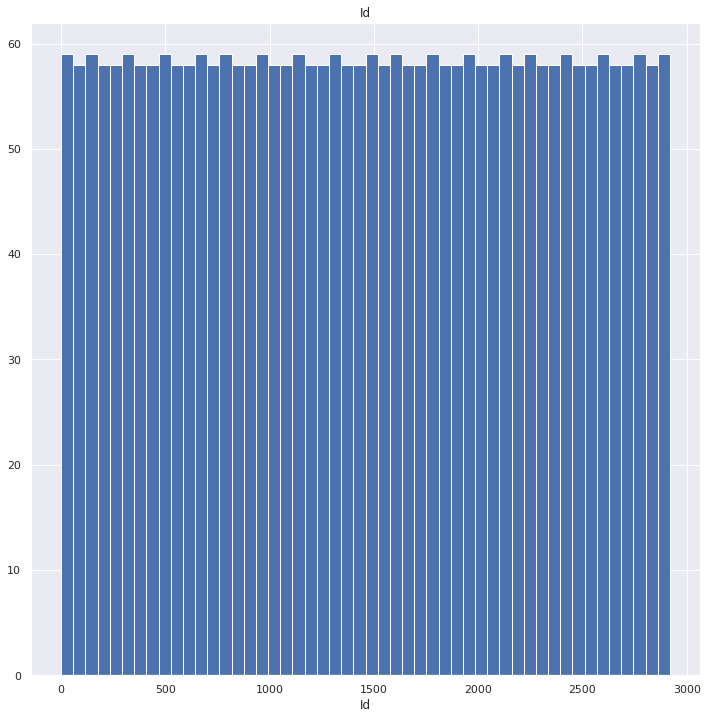

#####################################
count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
5%         20.000000
10%        20.000000
20%        20.000000
30%        20.000000
40%        30.000000
50%        50.000000
60%        60.000000
70%        60.000000
80%        80.000000
90%       120.000000
95%       160.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64


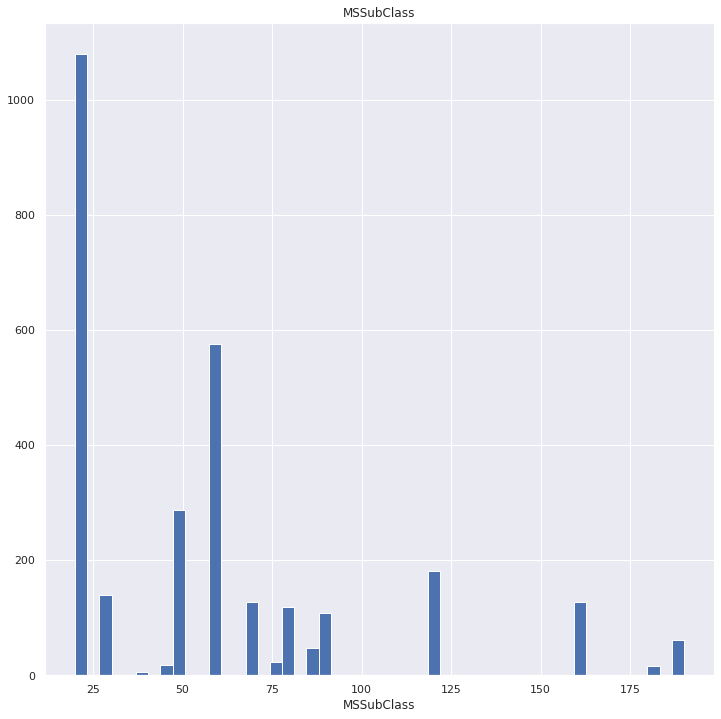

#####################################
count    2919.000000
mean       68.971908
std        20.404559
min        21.000000
5%         35.000000
10%        47.000000
20%        57.000000
30%        60.000000
40%        67.000000
50%        68.000000
60%        70.000000
70%        75.000000
80%        80.000000
90%        91.000000
95%       105.000000
99%       132.640000
max       173.000000
Name: LotFrontage, dtype: float64


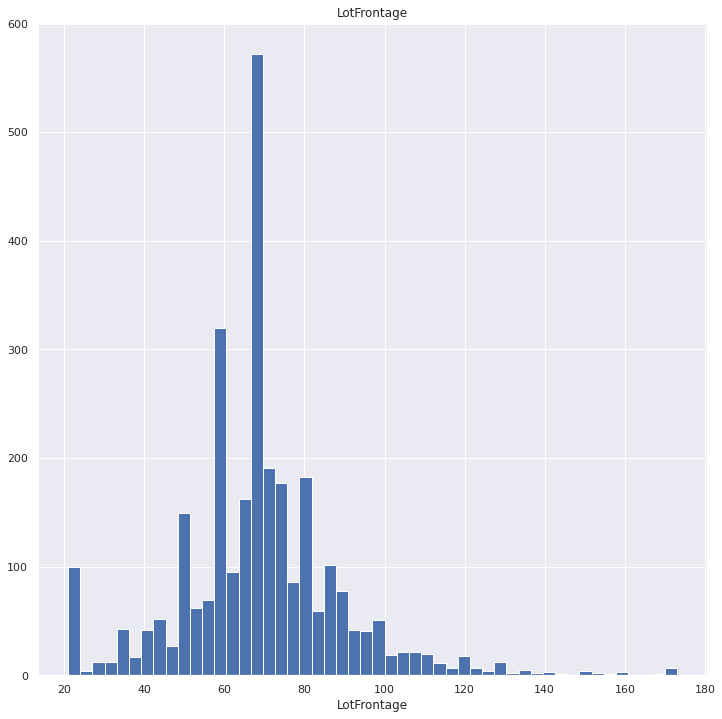

#####################################
count     2919.000000
mean      9818.098082
std       4351.591398
min       1300.000000
5%        3182.000000
10%       4922.400000
20%       7007.600000
30%       7960.400000
40%       8741.000000
50%       9453.000000
60%      10151.600000
70%      11001.200000
80%      12203.800000
90%      14300.600000
95%      17142.900000
99%      28367.900000
max      28367.900000
Name: LotArea, dtype: float64


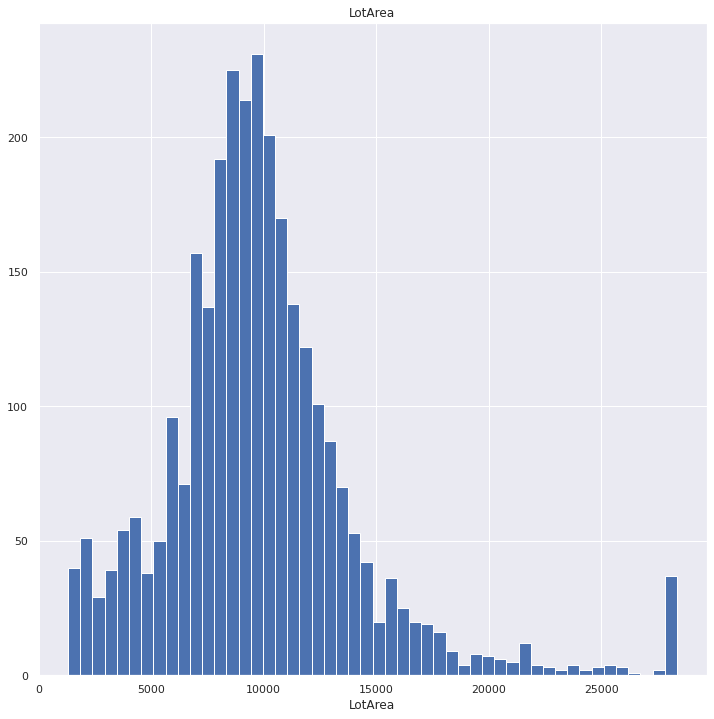

#####################################
count    2919.000000
mean        6.089072
std         1.409947
min         1.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         8.000000
95%         8.000000
99%        10.000000
max        10.000000
Name: OverallQual, dtype: float64


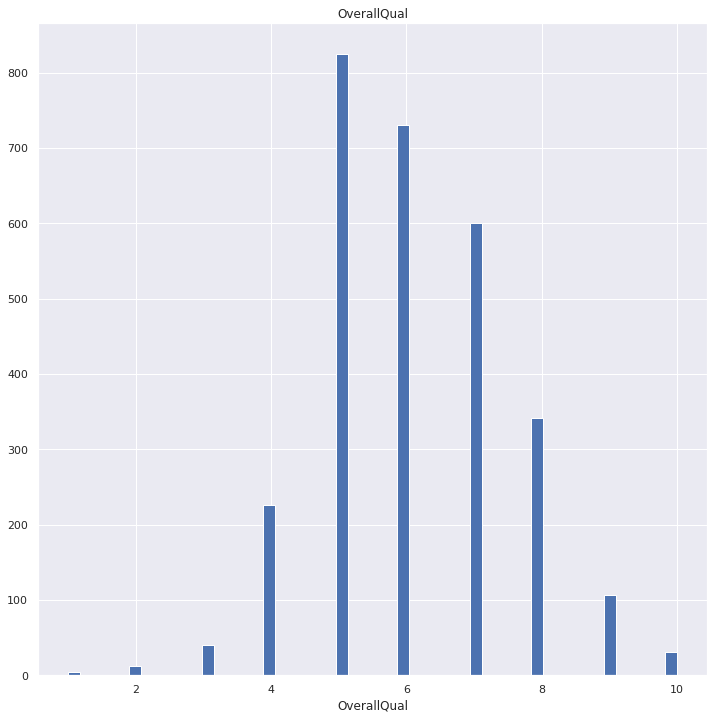

#####################################
count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
5%       1915.000000
10%      1924.000000
20%      1947.000000
30%      1957.000000
40%      1965.000000
50%      1973.000000
60%      1984.000000
70%      1998.000000
80%      2003.000000
90%      2006.000000
95%      2007.000000
99%      2008.000000
max      2010.000000
Name: YearBuilt, dtype: float64


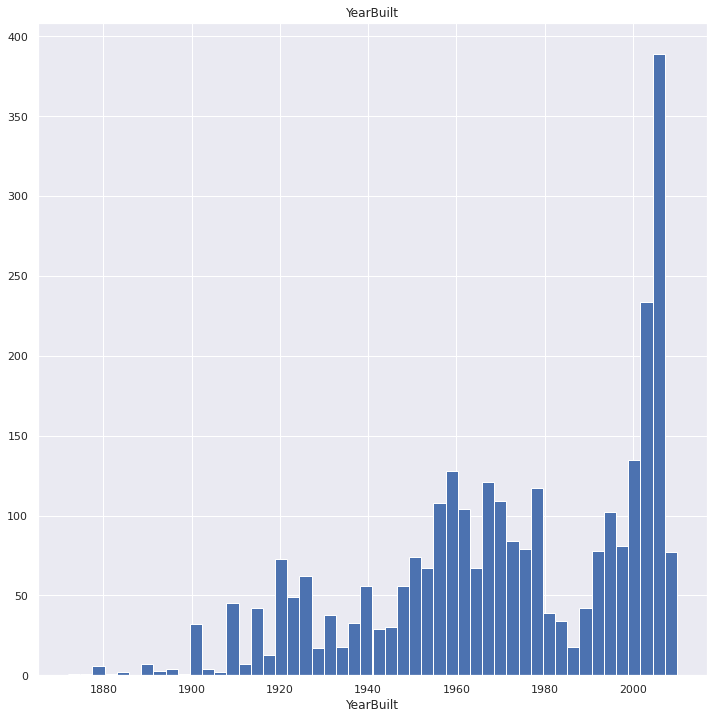

#####################################
count    2919.000000
mean     1984.264474
std        20.894344
min      1950.000000
5%       1950.000000
10%      1950.000000
20%      1960.000000
30%      1970.000000
40%      1978.000000
50%      1993.000000
60%      1998.000000
70%      2002.000000
80%      2005.000000
90%      2006.200000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


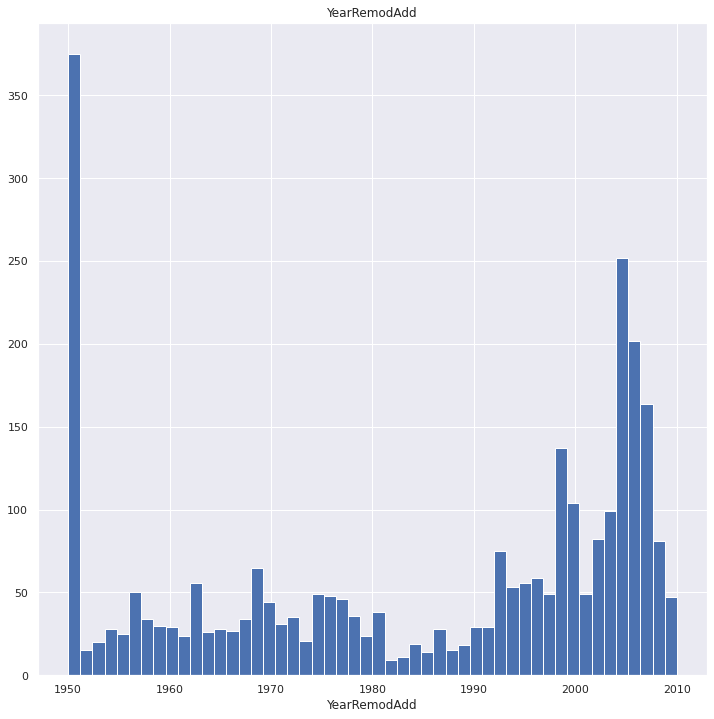

#####################################
count    2919.000000
mean       99.236896
std       167.605007
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%       120.000000
80%       200.000000
90%       322.200000
95%       466.000000
99%       770.460000
max       813.750000
Name: MasVnrArea, dtype: float64


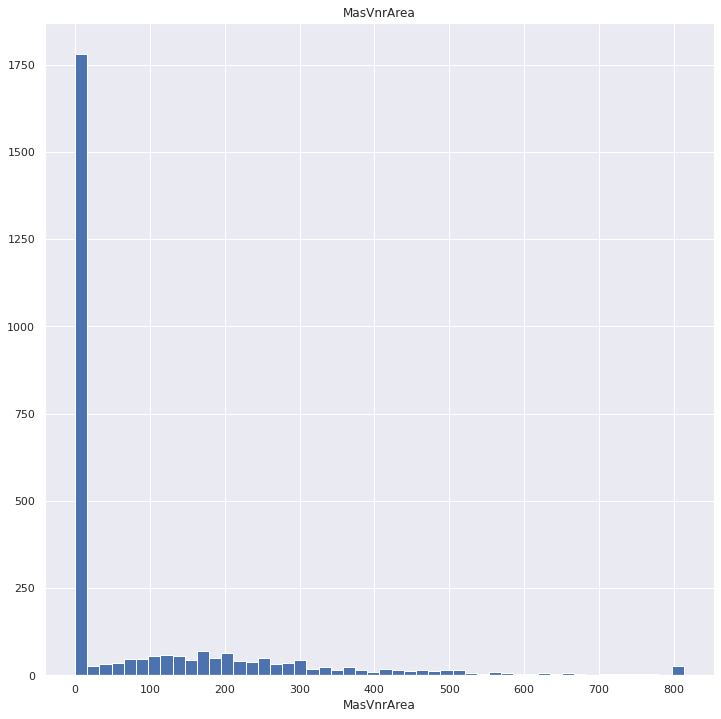

#####################################
count    2919.000000
mean      439.901336
std       444.060151
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%       203.000000
50%       368.500000
60%       514.800000
70%       656.000000
80%       812.000000
90%      1056.600000
95%      1274.000000
99%      1635.280000
max      2642.250000
Name: BsmtFinSF1, dtype: float64


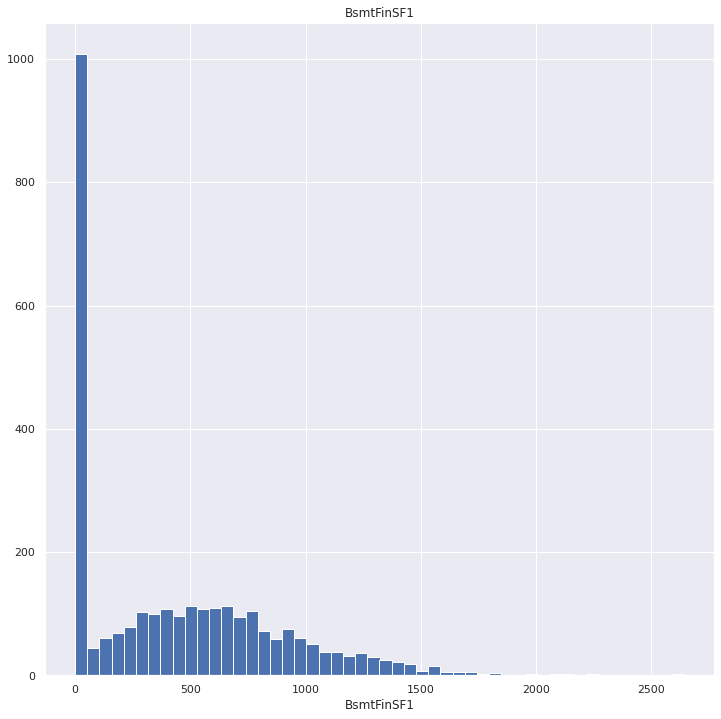

#####################################
count    2919.000000
mean       29.298732
std        85.765140
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       125.400000
95%       314.000000
99%       314.000000
max       314.000000
Name: BsmtFinSF2, dtype: float64


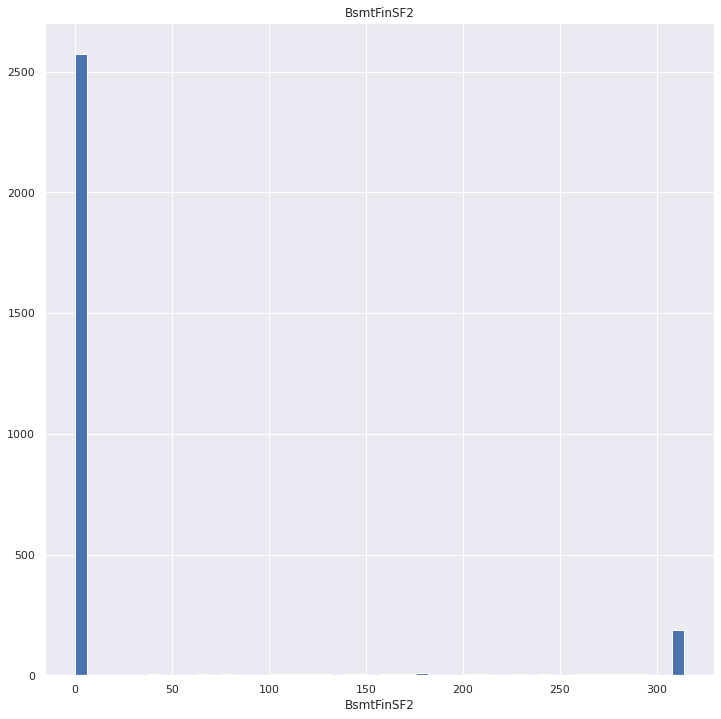

#####################################
count    2919.000000
mean      560.739979
std       439.471764
min         0.000000
5%          0.000000
10%        56.000000
20%       174.000000
30%       270.000000
40%       366.000000
50%       467.000000
60%       595.000000
70%       732.000000
80%       892.400000
90%      1212.400000
95%      1474.600000
99%      1776.460000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


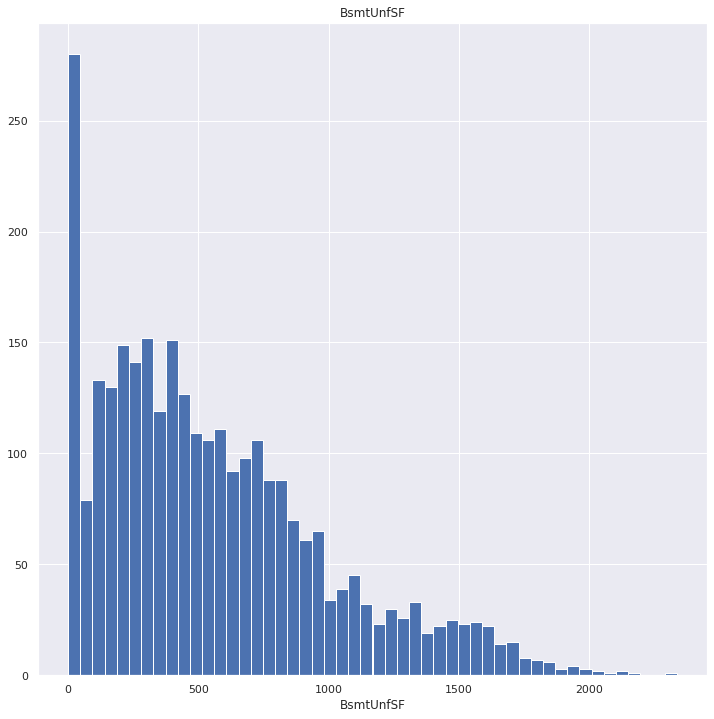

#####################################
count    2919.000000
mean     1050.017986
std       427.327584
min         0.000000
5%        455.500000
10%       600.000000
20%       741.000000
30%       836.000000
40%       911.200000
50%       989.500000
60%      1088.800000
70%      1216.000000
80%      1392.000000
90%      1614.000000
95%      1776.100000
99%      2198.200000
max      3135.000000
Name: TotalBsmtSF, dtype: float64


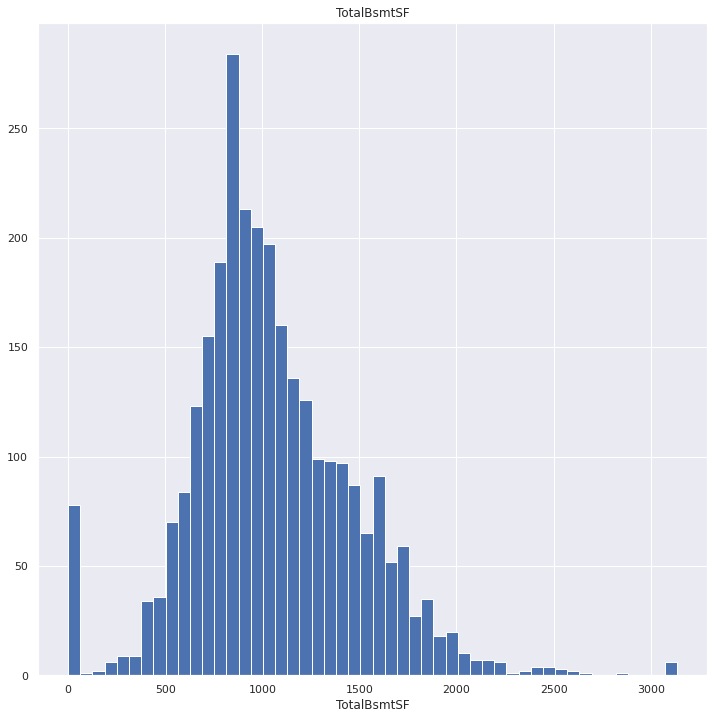

#####################################
count    2919.000000
mean     1157.998458
std       381.292918
min       334.000000
5%        665.900000
10%       744.800000
20%       847.000000
30%       914.000000
40%       996.200000
50%      1082.000000
60%      1180.000000
70%      1314.000000
80%      1483.400000
90%      1675.000000
95%      1830.100000
99%      2288.020000
max      3070.300000
Name: 1stFlrSF, dtype: float64


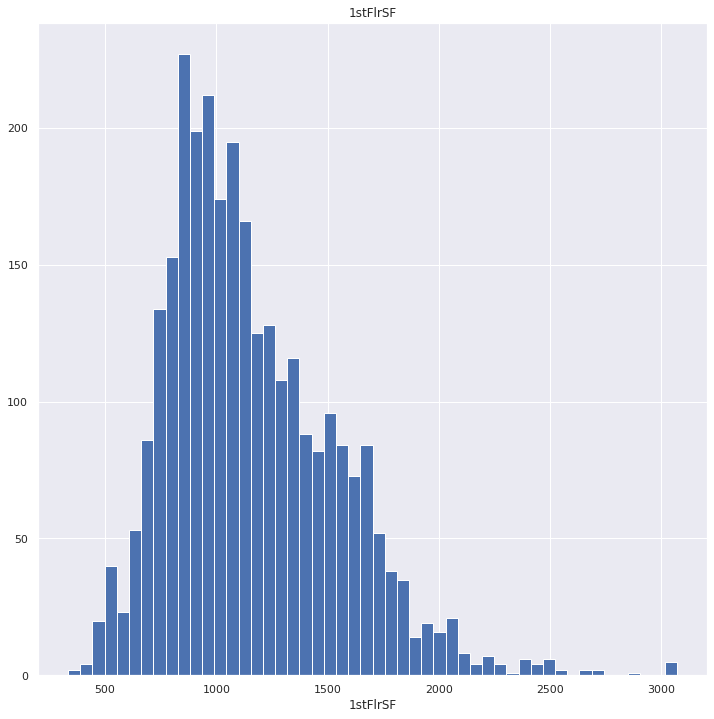

#####################################
count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       427.400000
70%       636.000000
80%       770.800000
90%       925.000000
95%      1131.200000
99%      1400.200000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


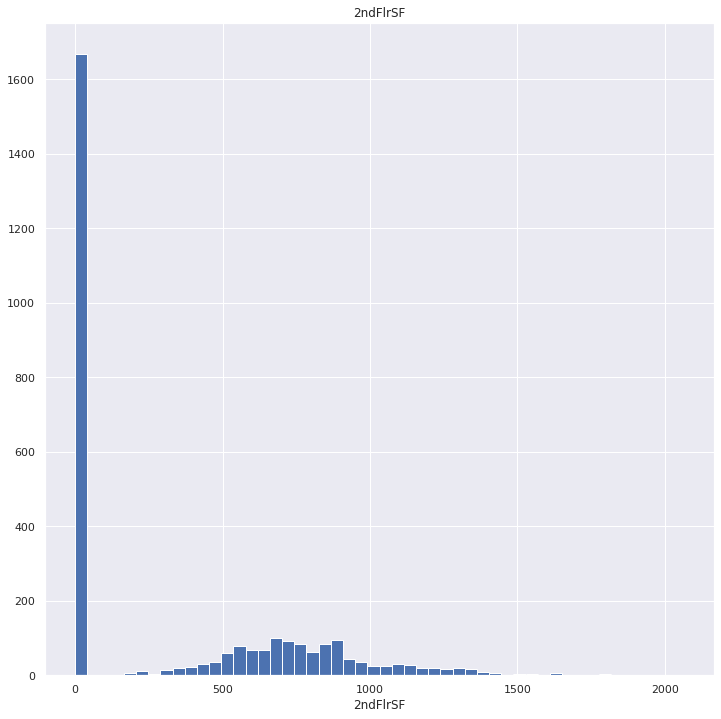

#####################################
count    2919.000000
mean     1499.314663
std       497.248442
min       334.000000
5%        861.000000
10%       923.800000
20%      1064.600000
30%      1200.000000
40%      1329.200000
50%      1444.000000
60%      1560.000000
70%      1680.000000
80%      1838.400000
90%      2153.200000
95%      2464.200000
99%      2935.720000
max      3997.300000
Name: GrLivArea, dtype: float64


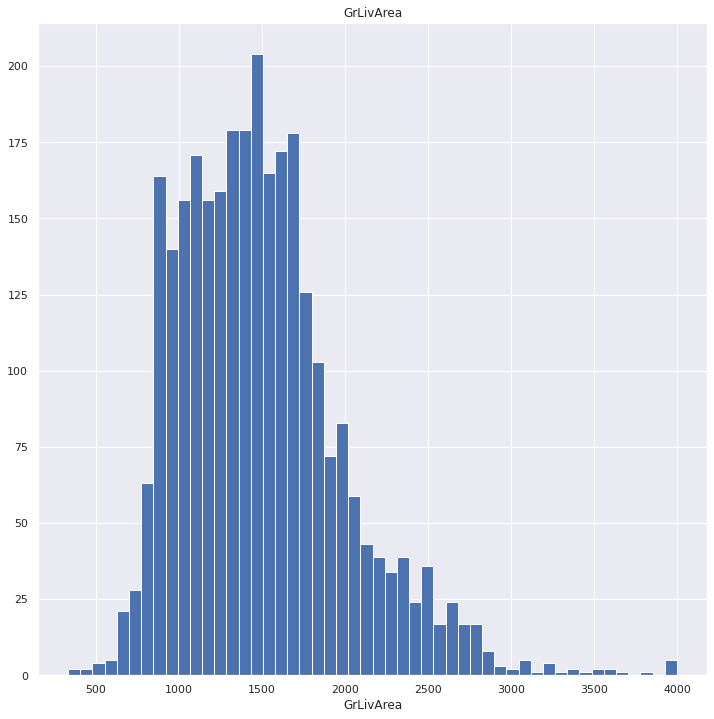

#####################################
count    2919.000000
mean        6.449983
std         1.562464
min         2.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         6.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%         8.000000
95%         9.000000
99%        11.000000
max        12.500000
Name: TotRmsAbvGrd, dtype: float64


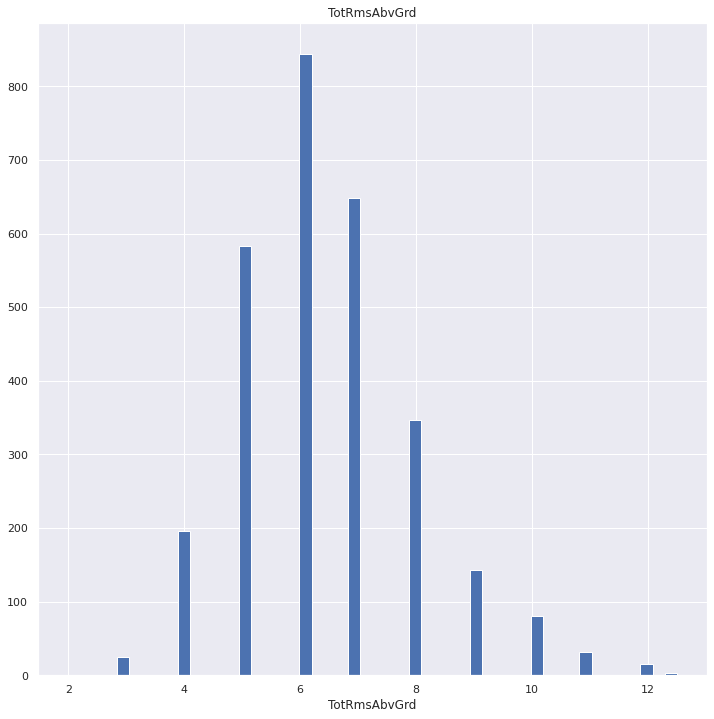

#####################################
count    2919.000000
mean     1978.126242
std        24.614678
min      1895.000000
5%       1930.000000
10%      1945.000000
20%      1957.600000
30%      1966.000000
40%      1974.000000
50%      1979.000000
60%      1991.000000
70%      1998.000000
80%      2003.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2103.500000
Name: GarageYrBlt, dtype: float64


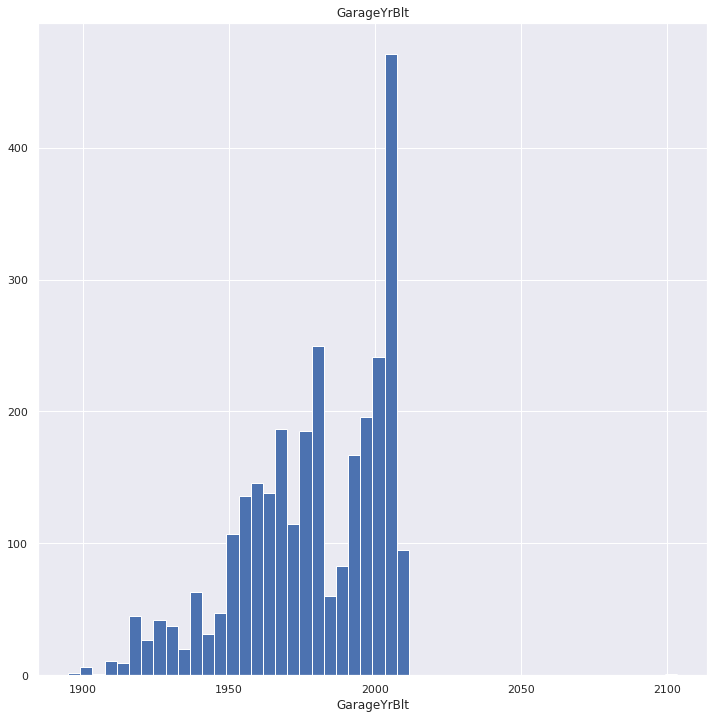

#####################################
count    2919.000000
mean      472.877013
std       215.357944
min         0.000000
5%          0.000000
10%       240.000000
20%       296.000000
30%       379.000000
40%       440.000000
50%       480.000000
60%       513.000000
70%       560.600000
80%       621.000000
90%       758.000000
95%       856.100000
99%      1019.460000
max      1488.000000
Name: GarageArea, dtype: float64


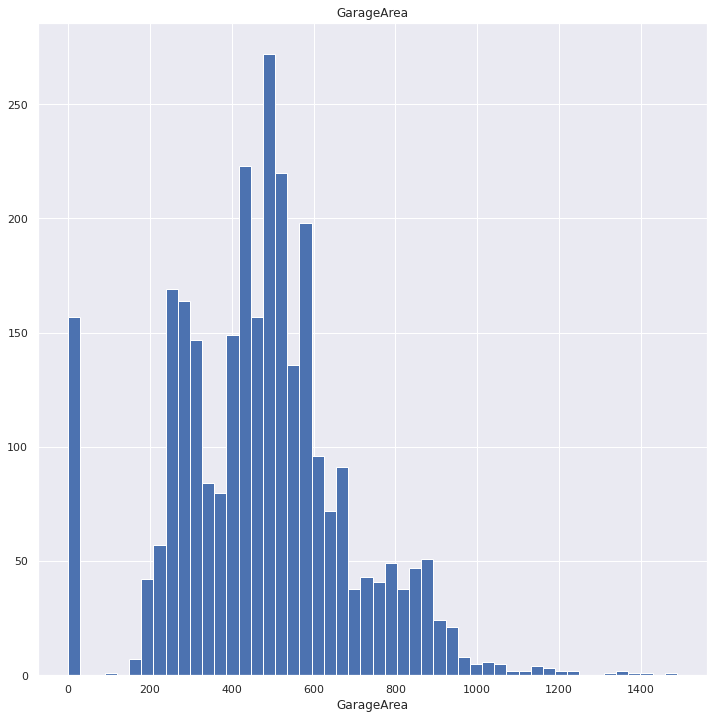

#####################################
count    2919.000000
mean       93.174546
std       123.169563
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       100.000000
70%       144.000000
80%       192.000000
90%       257.000000
95%       328.000000
99%       500.820000
max       642.500000
Name: WoodDeckSF, dtype: float64


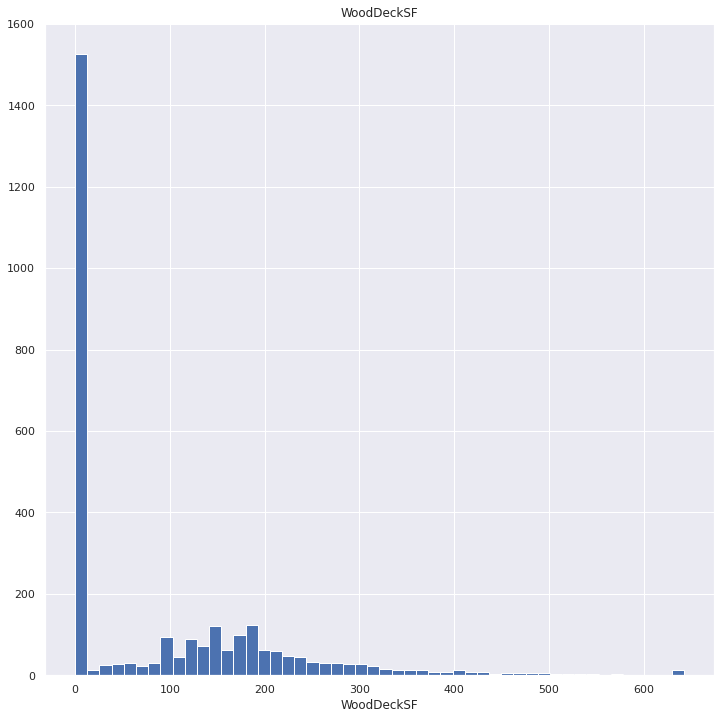

#####################################
count    2919.000000
mean       46.828708
std        63.694364
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%        26.000000
60%        40.000000
70%        58.000000
80%        85.000000
90%       131.200000
95%       183.100000
99%       284.460000
max       328.000000
Name: OpenPorchSF, dtype: float64


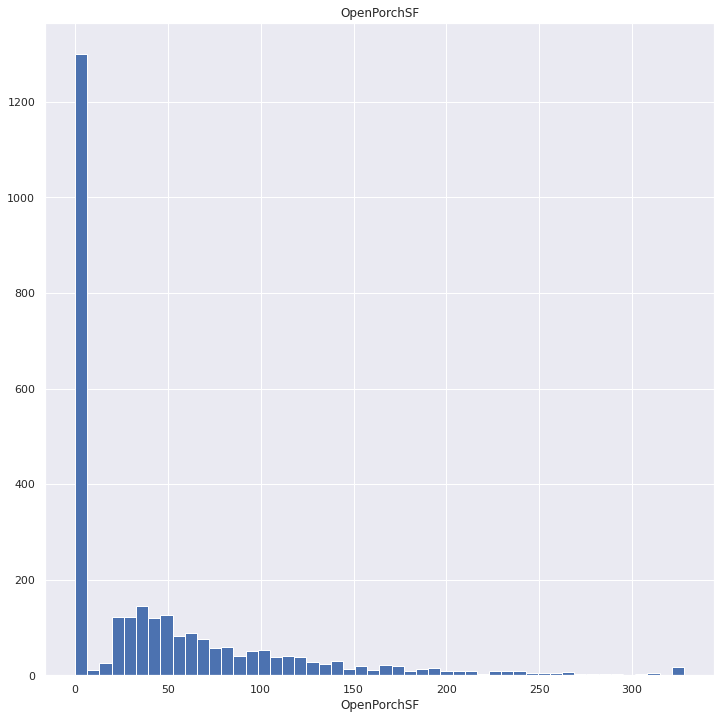

#####################################
count    2919.000000
mean       22.354231
std        58.955344
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       112.000000
95%       176.000000
99%       264.000000
max       280.000000
Name: EnclosedPorch, dtype: float64


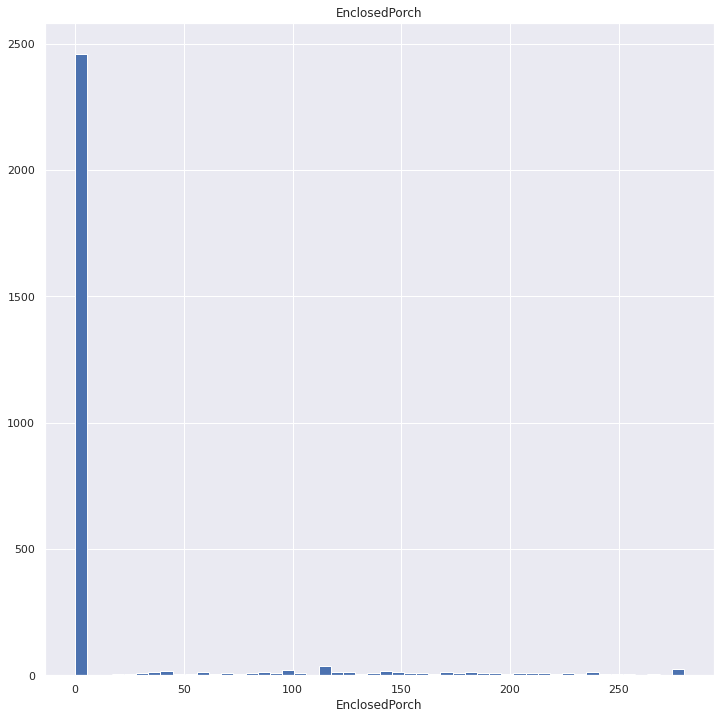

#####################################
count    2919.000000
mean        6.213087
std         2.714762
min         1.000000
5%          2.000000
10%         3.000000
20%         4.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%        10.000000
95%        11.000000
99%        12.000000
max        12.000000
Name: MoSold, dtype: float64


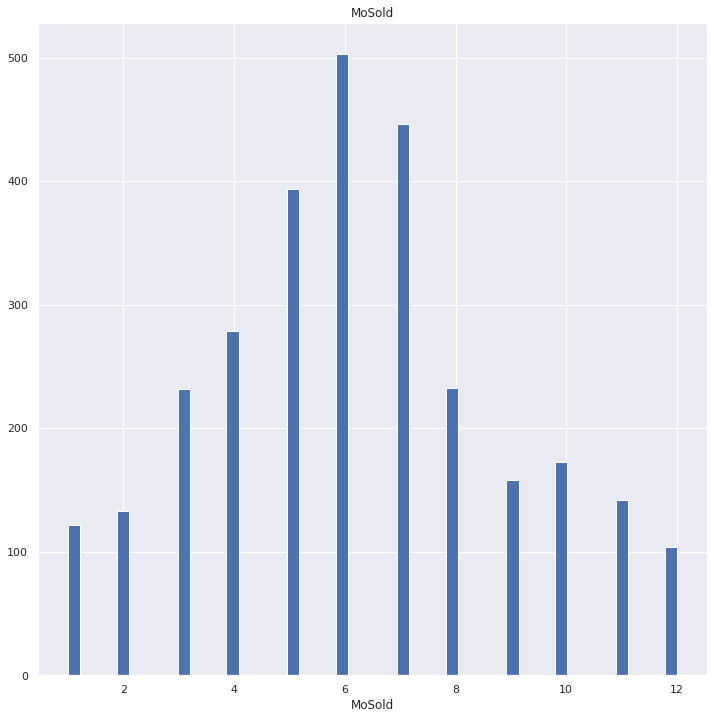

#####################################
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64


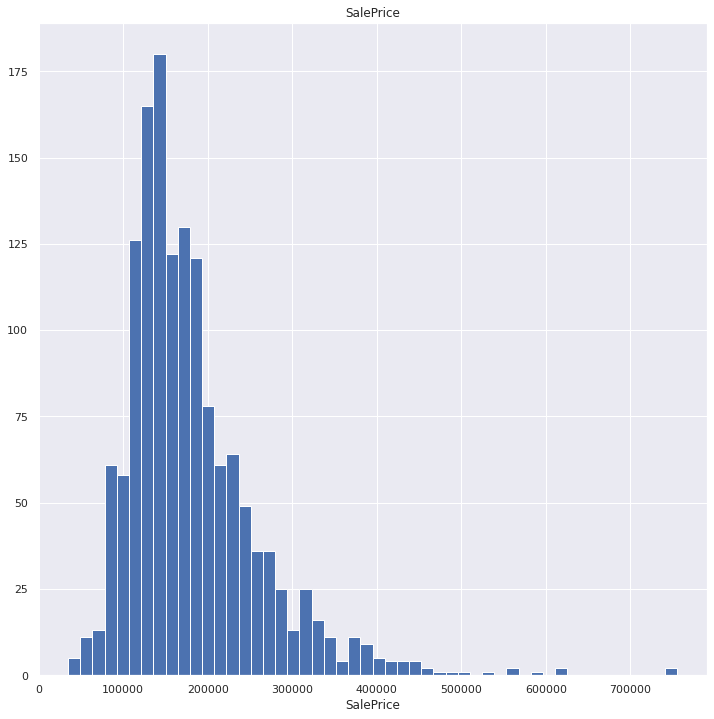

#####################################
count    2.919000e+03
mean     1.839717e+06
std      1.162014e+06
min      1.115560e+05
5%       6.359600e+05
10%      7.644336e+05
20%      9.767776e+05
30%      1.132518e+06
40%      1.317289e+06
50%      1.547536e+06
60%      1.800920e+06
70%      2.149625e+06
80%      2.563201e+06
90%      3.209853e+06
95%      4.000000e+06
99%      5.985984e+06
max      1.227291e+07
Name: NEW_1st*GrLiv, dtype: float64


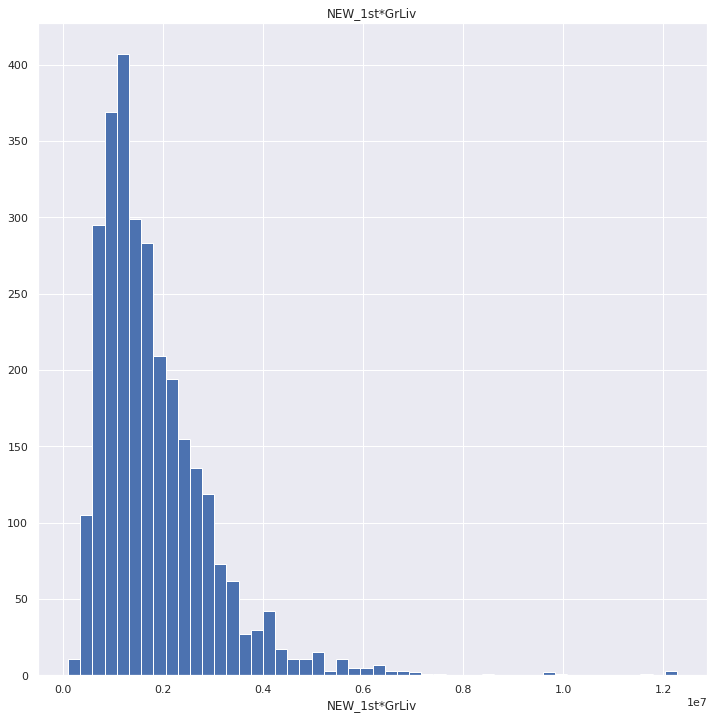

#####################################
count    2.919000e+03
mean     7.608985e+05
std      5.375357e+05
min      0.000000e+00
5%       0.000000e+00
10%      2.568384e+05
20%      3.368120e+05
30%      4.537632e+05
40%      5.698420e+05
50%      6.564800e+05
60%      7.579560e+05
70%      8.817336e+05
80%      1.079677e+06
90%      1.452134e+06
95%      1.783983e+06
99%      2.566037e+06
max      5.668171e+06
Name: NEW_Garage*GrLiv, dtype: float64


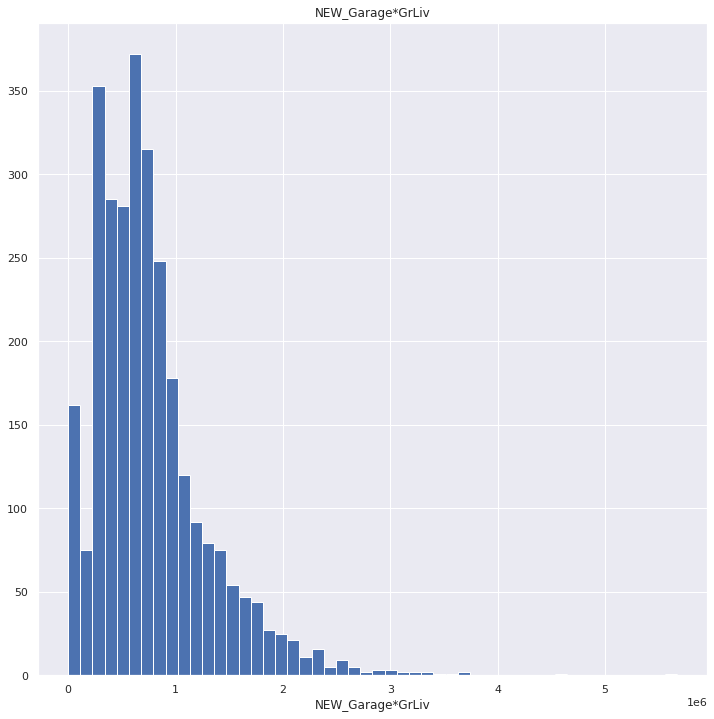

#####################################
count    2919.000000
mean       11.653649
std         1.712435
min         2.000000
5%          9.000000
10%        10.000000
20%        10.000000
30%        11.000000
40%        11.000000
50%        12.000000
60%        12.000000
70%        12.000000
80%        13.000000
90%        14.000000
95%        14.000000
99%        15.000000
max        19.000000
Name: TotalQual, dtype: float64


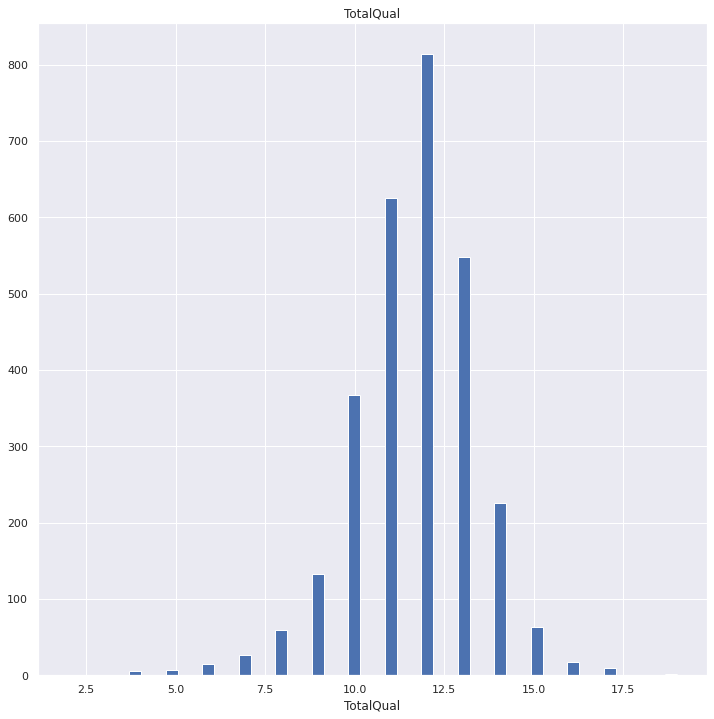

#####################################
count    2919.000000
mean     1494.482186
std       495.039519
min       334.000000
5%        858.000000
10%       919.000000
20%      1059.600000
30%      1193.000000
40%      1324.000000
50%      1440.000000
60%      1558.800000
70%      1680.000000
80%      1837.400000
90%      2140.400000
95%      2462.200000
99%      2871.280000
max      4608.300000
Name: NEW_TotalFlrSF, dtype: float64


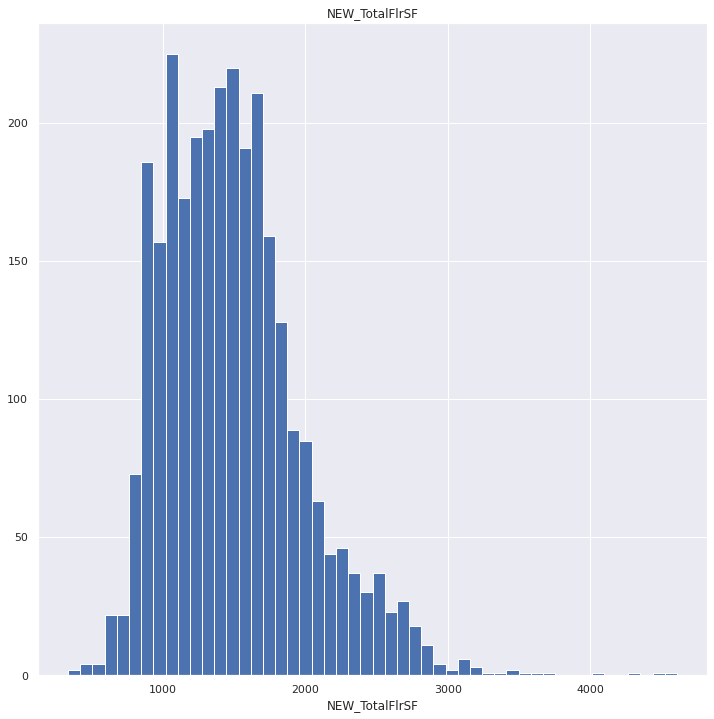

#####################################
count    2919.000000
mean      469.200069
std       449.598187
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%       288.000000
50%       436.000000
60%       564.800000
70%       691.600000
80%       838.800000
90%      1084.000000
95%      1290.400000
99%      1644.920000
max      2642.250000
Name: NEW_TotalBsmtFin, dtype: float64


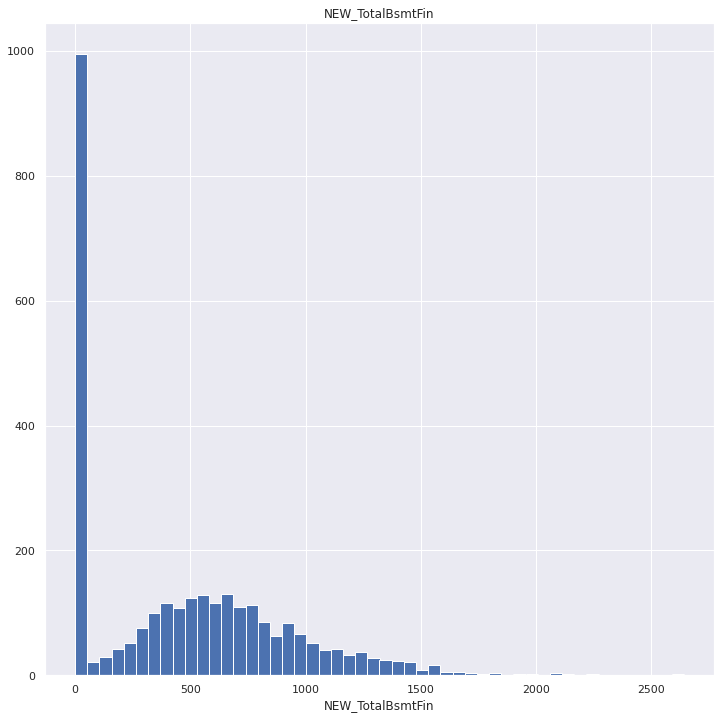

#####################################
count    2919.000000
mean      162.357485
std       144.745451
min         0.000000
5%          0.000000
10%         0.000000
20%        23.600000
30%        55.000000
40%       102.000000
50%       141.000000
60%       180.000000
70%       225.000000
80%       275.000000
90%       350.000000
95%       432.100000
99%       625.280000
max       874.000000
Name: NEW_PorchArea, dtype: float64


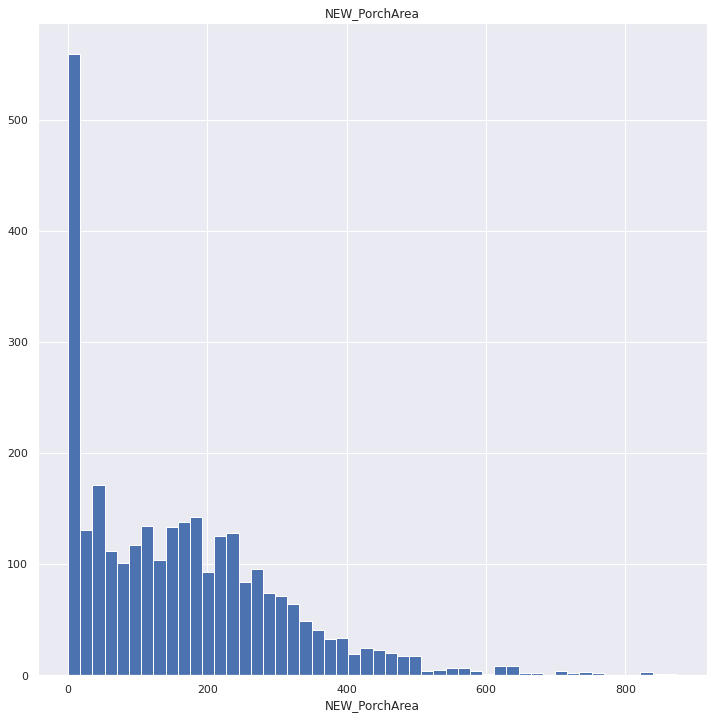

#####################################
count    2919.000000
mean     2544.500171
std       780.279938
min       334.000000
5%       1512.900000
10%      1696.000000
20%      1893.600000
30%      2083.400000
40%      2264.000000
50%      2448.000000
60%      2648.000000
70%      2866.000000
80%      3144.800000
90%      3560.800000
95%      3934.400000
99%      4808.300000
max      7743.300000
Name: NEW_TotalHouseArea, dtype: float64


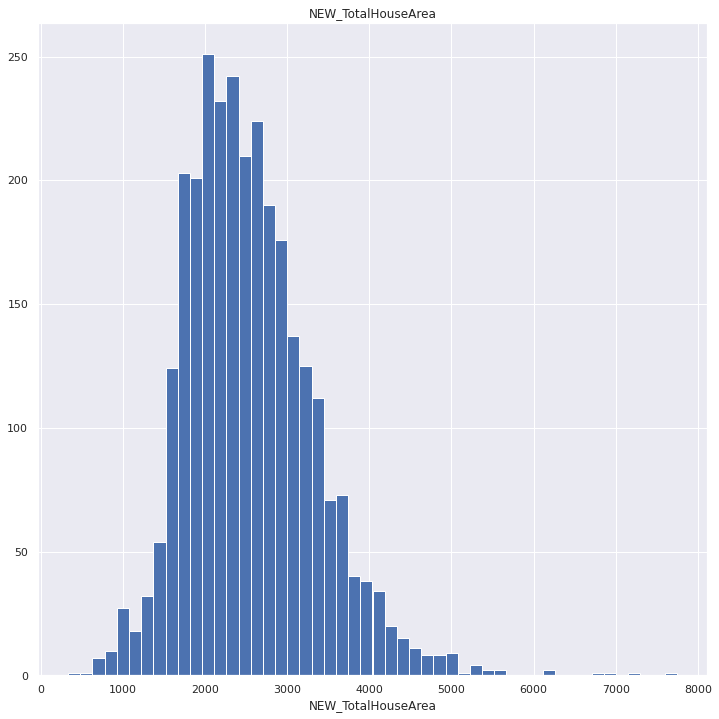

#####################################
count    2919.000000
mean     2549.332648
std       780.671751
min       334.000000
5%       1512.900000
10%      1696.000000
20%      1899.200000
30%      2096.000000
40%      2267.000000
50%      2453.000000
60%      2652.000000
70%      2872.000000
80%      3148.000000
90%      3564.400000
95%      3934.400000
99%      4830.680000
max      7132.300000
Name: NEW_TotalSqFeet, dtype: float64


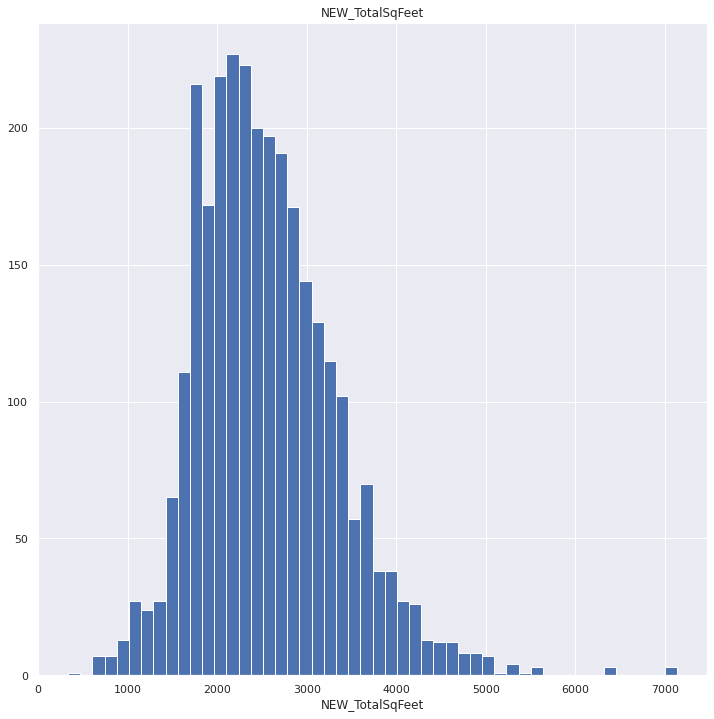

#####################################
count    2919.000000
mean        0.183019
std         0.114996
min         0.037190
5%          0.079889
10%         0.093971
20%         0.112495
30%         0.126607
40%         0.140622
50%         0.155662
60%         0.171044
70%         0.190516
80%         0.215302
90%         0.281456
95%         0.417654
99%         0.677637
max         1.043403
Name: NEW_LotRatio, dtype: float64


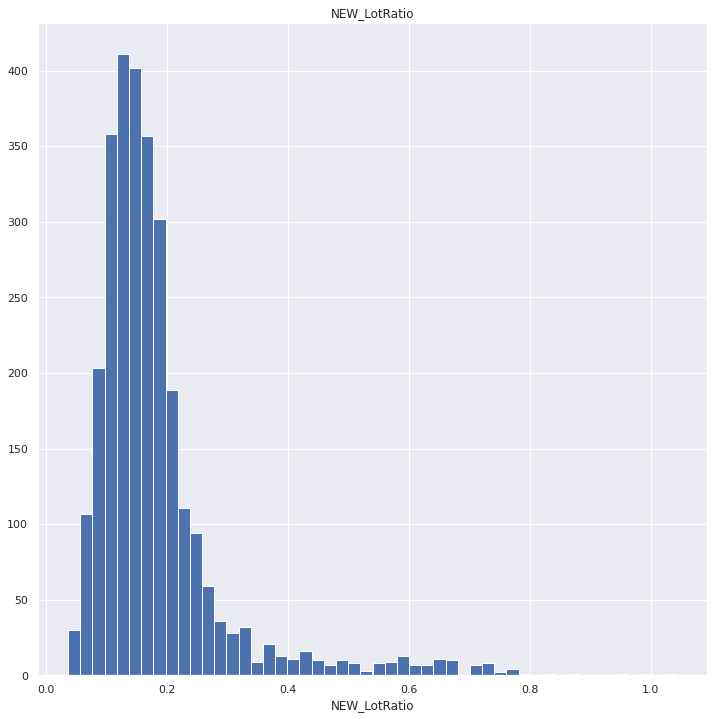

#####################################
count    2919.000000
mean        0.308719
std         0.178975
min         0.037190
5%          0.135001
10%         0.165341
20%         0.198778
30%         0.224148
40%         0.244798
50%         0.266710
60%         0.291290
70%         0.318817
80%         0.356608
90%         0.464205
95%         0.750086
99%         1.059754
max         1.521181
Name: NEW_RatioArea, dtype: float64


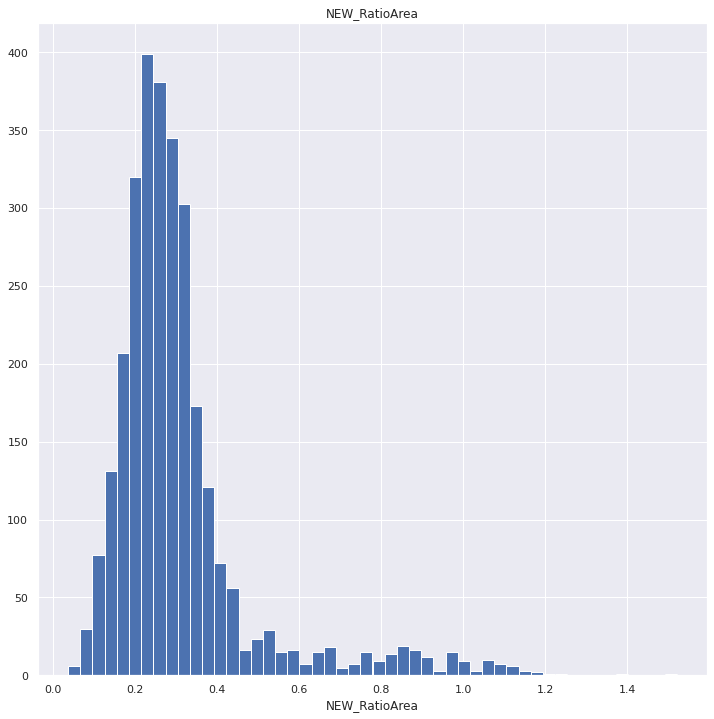

#####################################
count    2919.000000
mean        0.056385
std         0.037867
min         0.000000
5%          0.000000
10%         0.023648
20%         0.031566
30%         0.037992
40%         0.043676
50%         0.048706
60%         0.054698
70%         0.062294
80%         0.073333
90%         0.094899
95%         0.137322
99%         0.192982
max         0.355385
Name: NEW_GarageLotRatio, dtype: float64


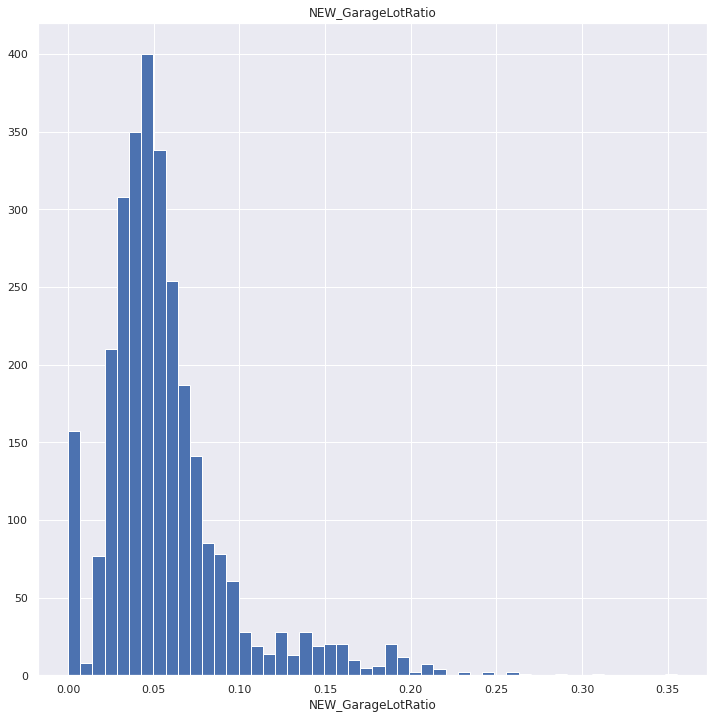

#####################################
count    2919.000000
mean        0.034254
std         0.056840
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.044380
80%         0.073700
90%         0.109580
95%         0.150588
99%         0.249977
max         0.410884
Name: NEW_MasVnrRatio, dtype: float64


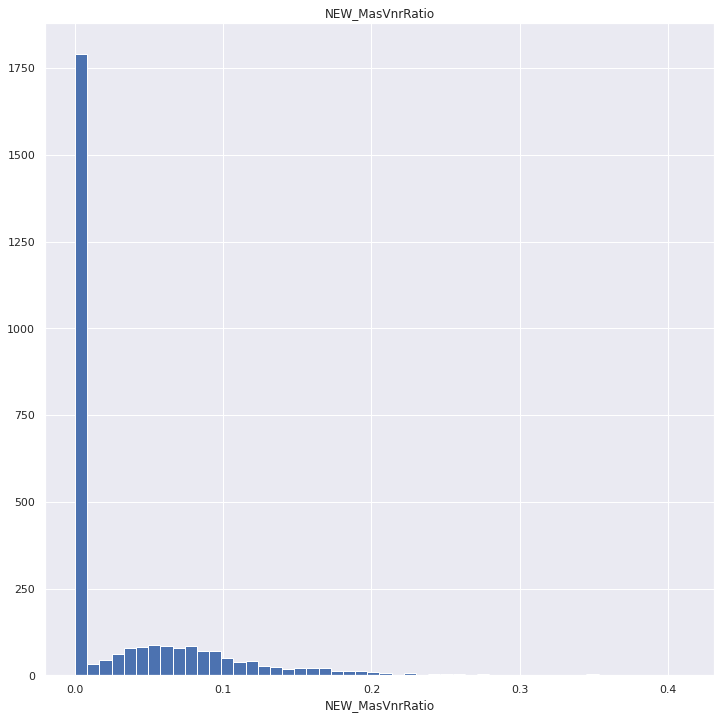

#####################################
count     2919.000000
mean      7931.690579
std       4086.586652
min        -42.000000
5%        1390.000000
10%       3233.200000
20%       5264.000000
30%       6236.400000
40%       6967.200000
50%       7571.000000
60%       8211.600000
70%       9008.000000
80%      10061.800000
90%      11952.800000
95%      14769.500000
99%      24793.100000
max      26929.900000
Name: NEW_DifArea, dtype: float64


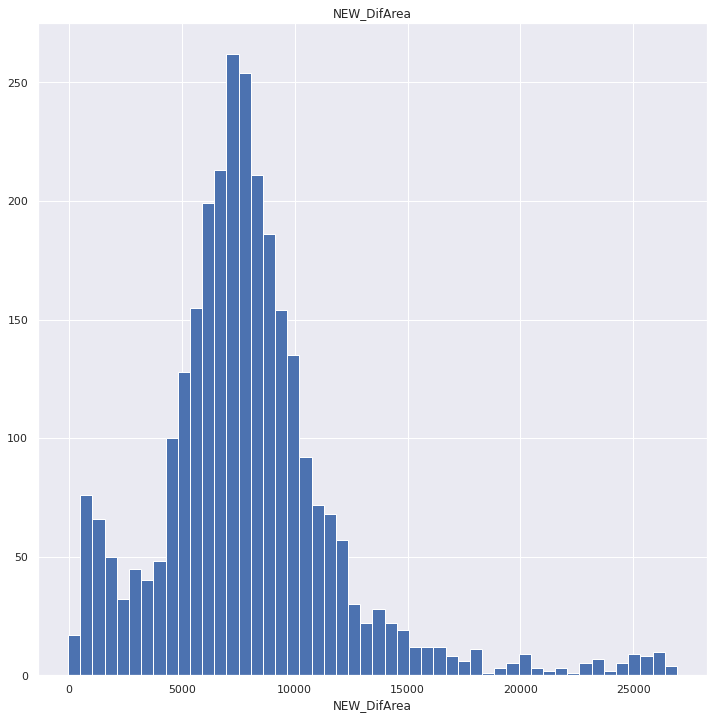

#####################################
count    2919.000000
mean       33.735868
std         9.186204
min         1.000000
5%         20.000000
10%        24.000000
20%        25.000000
30%        30.000000
40%        30.000000
50%        35.000000
60%        35.000000
70%        36.000000
80%        40.000000
90%        45.000000
95%        48.000000
99%        56.000000
max        90.000000
Name: NEW_OverallGrade, dtype: float64


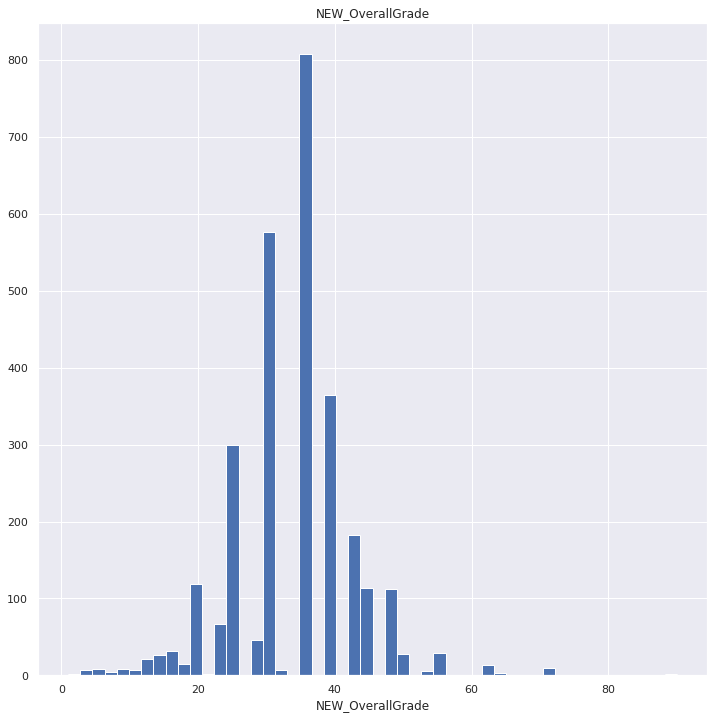

#####################################
count    2919.000000
mean       12.951696
std        24.065624
min        -1.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         1.000000
70%         5.000000
80%        27.400000
90%        49.000000
95%        72.000000
99%       100.000000
max       127.000000
Name: NEW_Restoration, dtype: float64


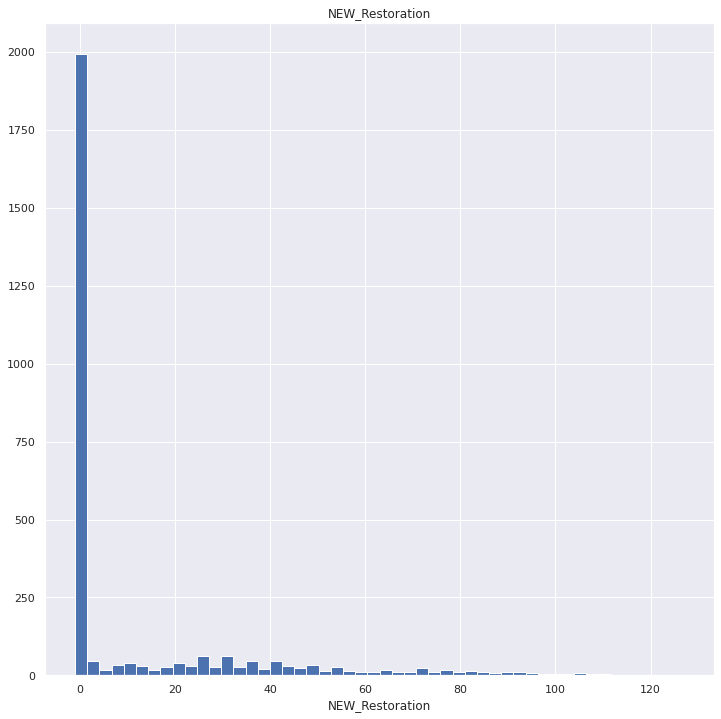

#####################################
count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
5%          1.000000
10%         1.000000
20%         5.000000
30%        10.000000
40%        23.000000
50%        35.000000
60%        43.000000
70%        51.000000
80%        61.000000
90%        84.000000
95%        92.000000
99%       110.000000
max       136.000000
Name: NEW_HouseAge, dtype: float64


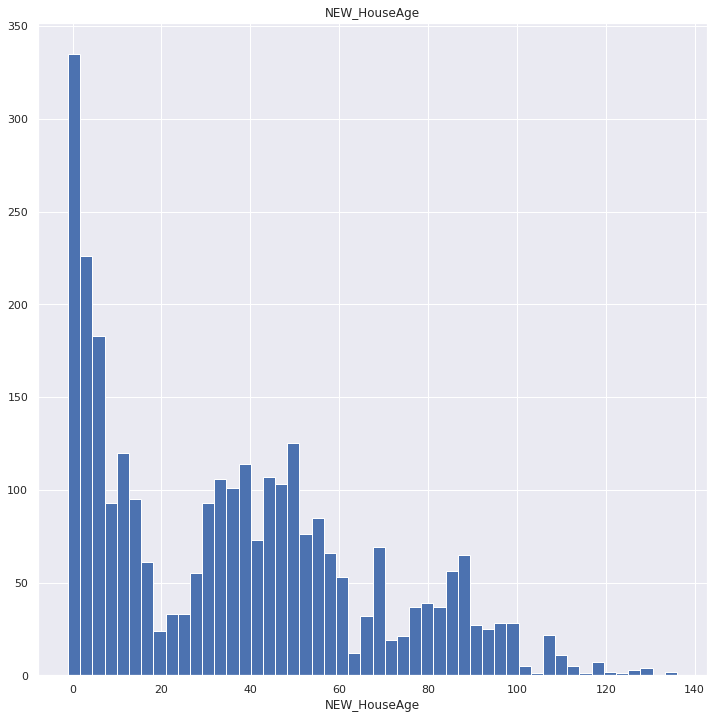

#####################################
count    2919.000000
mean       23.528263
std        20.892061
min        -2.000000
5%          0.000000
10%         1.000000
20%         3.000000
30%         6.000000
40%        10.000000
50%        15.000000
60%        30.000000
70%        38.000000
80%        48.000000
90%        56.000000
95%        58.000000
99%        60.000000
max        60.000000
Name: NEW_RestorationAge, dtype: float64


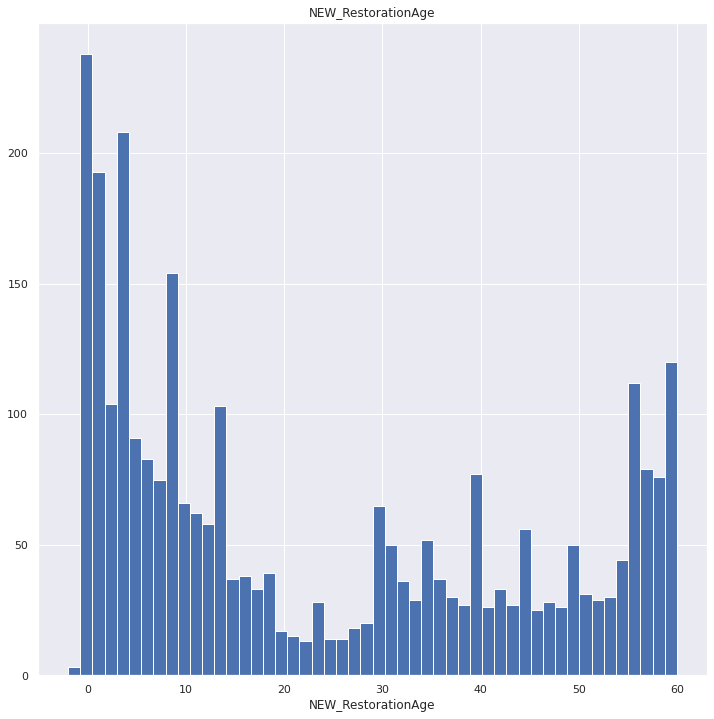

#####################################
count    2919.000000
mean        6.813464
std        18.393607
min       -28.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         1.000000
90%        31.000000
95%        55.000000
99%        83.000000
max       123.000000
Name: NEW_GarageAge, dtype: float64


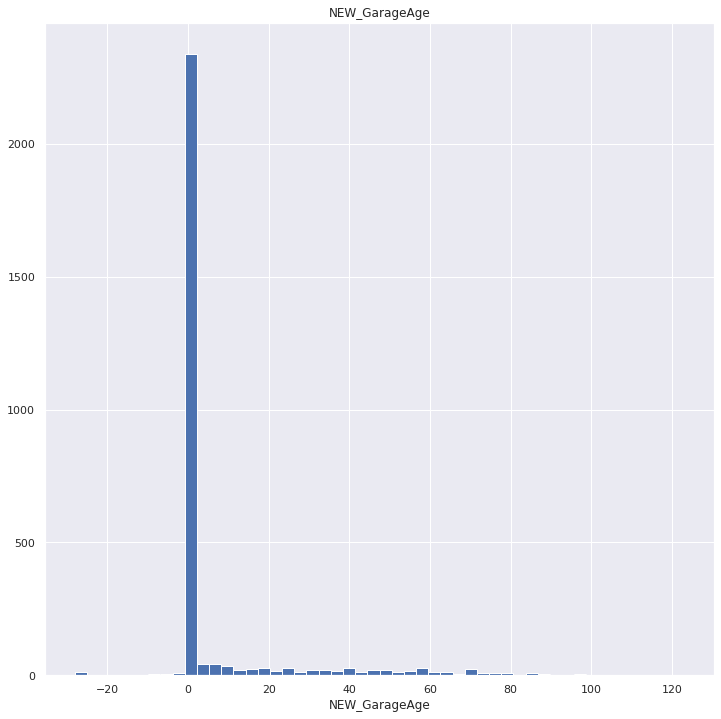

#####################################
count    2919.000000
mean       10.287941
std        18.026998
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         1.000000
70%         9.000000
80%        23.000000
90%        36.000000
95%        50.000000
99%        78.000000
max       107.000000
Name: NEW_GarageRestorationAge, dtype: float64


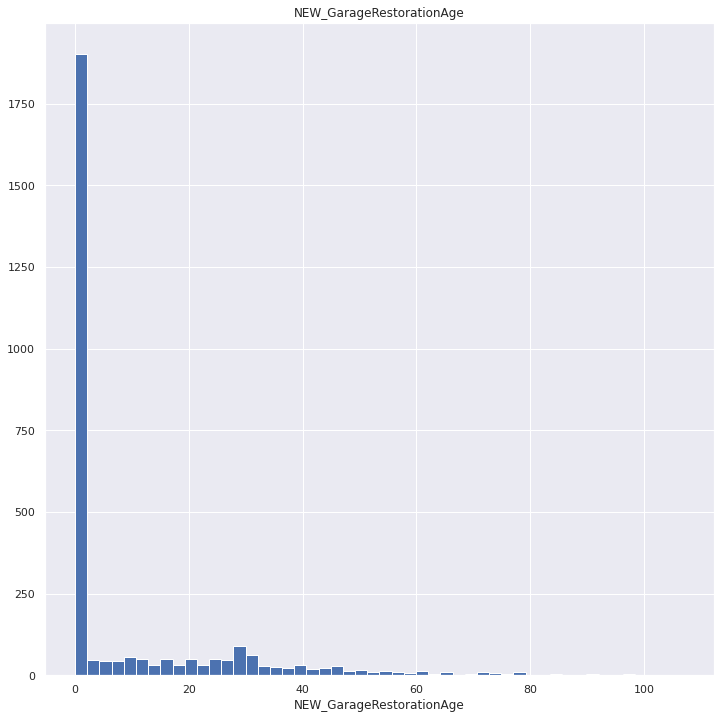

#####################################
count    2919.000000
mean       29.666495
std        24.654380
min       -96.500000
5%          0.000000
10%         1.000000
20%         5.000000
30%        10.000000
40%        17.000000
50%        29.000000
60%        33.000000
70%        42.000000
80%        50.000000
90%        63.000000
95%        79.000000
99%        93.000000
max       114.000000
Name: NEW_GarageSold, dtype: float64


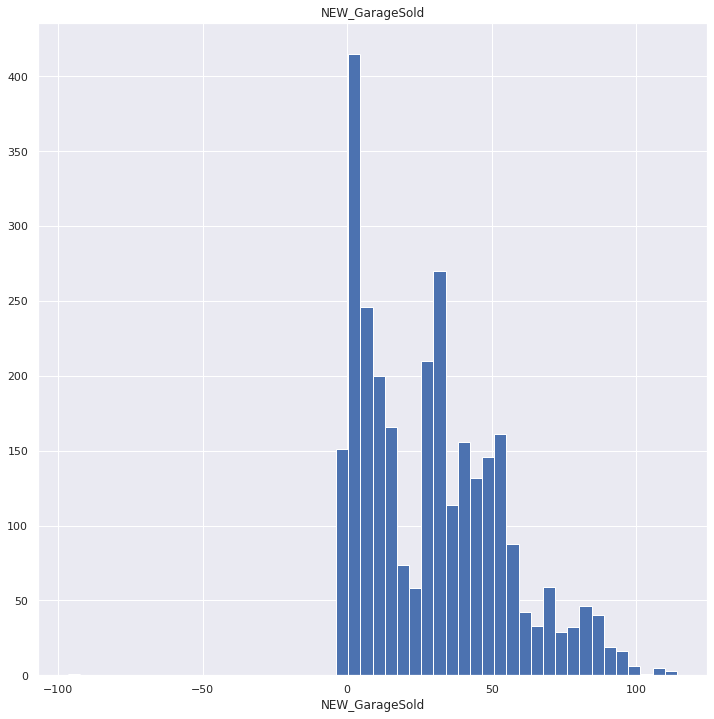

#####################################


In [58]:
# 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in num_cols:
    num_summary(df, col, True)


In [59]:
# 4. Hedef Değişken Analizi 

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df,"SalePrice",col)
    

            TARGET_MEAN
MSZoning               
C (all)    74528.000000
FV        214014.061538
RH        131558.375000
RL        191004.994787
RM        126316.830275


            TARGET_MEAN
LotShape               
IR1       206101.665289
IR2       239833.365854
IR3       216036.500000
Reg       164754.818378


             TARGET_MEAN
LotConfig               
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529


              TARGET_MEAN
Condition1               
Artery      135091.666667
Feedr       142475.481481
Norm        184495.492063
PosA        225875.000000
PosN        215184.210526
RRAe        138400.000000
RRAn        184396.615385
RRNe        190750.000000
RRNn        212400.000000


              TARGET_MEAN
Condition2               
Artery      106500.000000
Feedr       121166.666667
Norm        181169.405536
PosA        325000.000000
PosN        284875.000000
RRAe        190000.000000
RRAn       

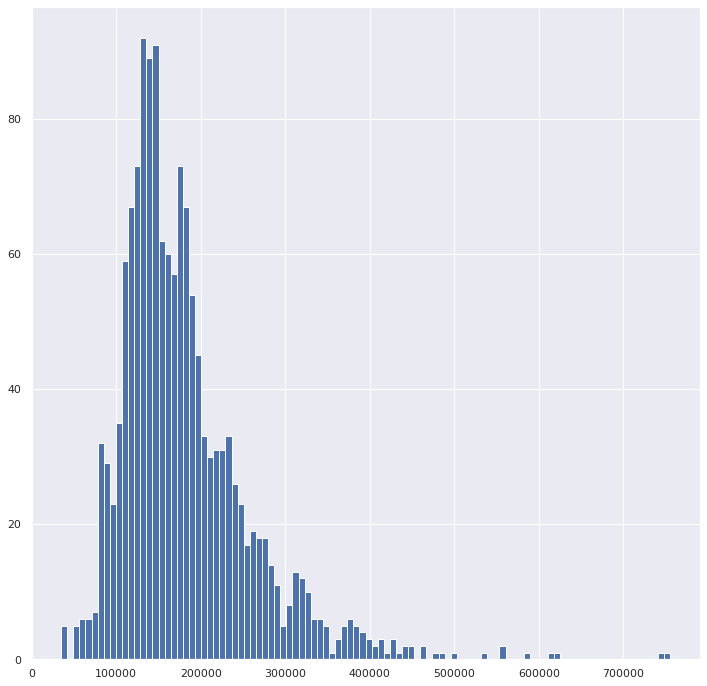

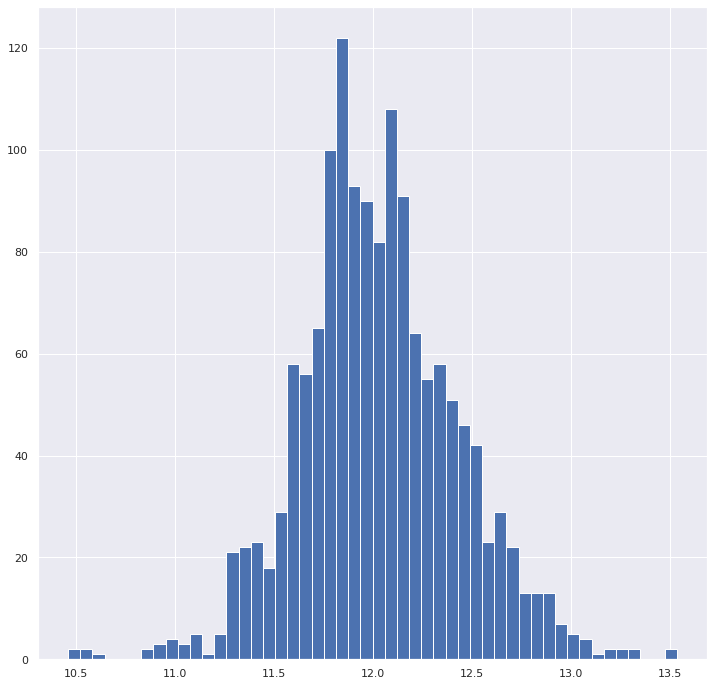

In [60]:
# Bağımlı değişkenin incelenmesi
df["SalePrice"].hist(bins=100)
plt.show()

# Bağımlı değişkenin logaritmasının incelenmesi
np.log1p(df['SalePrice']).hist(bins=50)
plt.show()

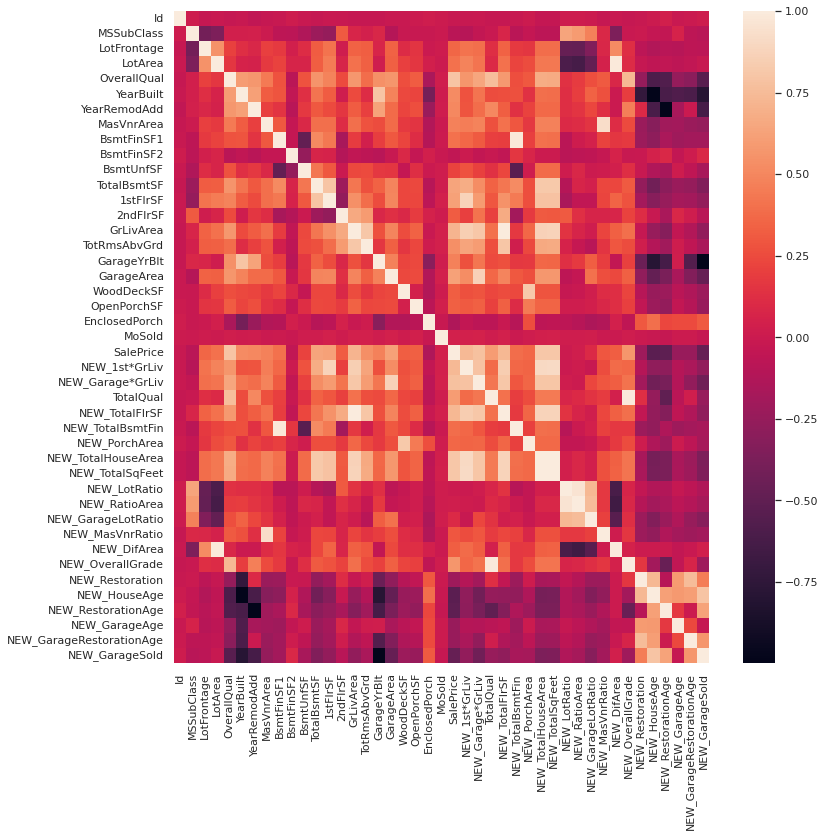

In [61]:
# 5. Korelasyon Analizi (Analysis of Correlation)

corr = df[num_cols].corr()
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr)
plt.show()


In [62]:
# Görev 2 : Feature Engineering
######################################
# Aykırı Değer Analizi

# Aykırı değerlerin baskılanması
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

# Aykırı değer kontrolü
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [63]:
for col in num_cols:
    if col != "SalePrice":
      print(col, check_outlier(df, col))


Id False
MSSubClass False
LotFrontage True
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt True
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
MoSold False
NEW_1st*GrLiv True
NEW_Garage*GrLiv True
TotalQual True
NEW_TotalFlrSF True
NEW_TotalBsmtFin False
NEW_PorchArea False
NEW_TotalHouseArea True
NEW_TotalSqFeet True
NEW_LotRatio True
NEW_RatioArea True
NEW_GarageLotRatio True
NEW_MasVnrRatio True
NEW_DifArea True
NEW_OverallGrade True
NEW_Restoration True
NEW_HouseAge False
NEW_RestorationAge False
NEW_GarageAge True
NEW_GarageRestorationAge True
NEW_GarageSold True


In [70]:
# Aykırı değerlerin baskılanması
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df,col)


In [72]:
# Eksik Değer Analizi

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)



           n_miss  ratio
SalePrice    1459  49.98


In [74]:
# Bazı değişkenlerdeki boş değerler evin o özelliğe sahip olmadığını ifade etmektedir
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

# Kolonlardaki boşlukların "No" ifadesi ile doldurulması
for col in no_cols:
    df[col].fillna("No",inplace=True)

missing_values_table(df)


KeyError: 'Alley'

In [75]:
# Bu fonsksiyon eksik değerlerin median veya mean ile doldurulmasını sağlar

def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Eksik değere sahip olan değişkenler listelenir

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Uygulama öncesi değişkenlerin eksik değerlerinin sayısı

    # değişken object ve sınıf sayısı cat_lengthe eşit veya altındaysa boş değerleri mode ile doldur
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # num_method mean ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # num_method median ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data


In [76]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE
SalePrice    1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

SalePrice    1459
dtype: int64 




In [77]:
# Rare analizi yapınız ve rare encoder uygulayınız.
######################################

# Kategorik kolonların dağılımının incelenmesi

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "SalePrice", cat_cols)




MSZoning : 5
         COUNT     RATIO    TARGET_MEAN
C (all)     25  0.008565   74528.000000
FV         139  0.047619  214014.061538
RH          26  0.008907  131558.375000
RL        2269  0.777321  191004.994787
RM         460  0.157588  126316.830275


LotShape : 4
     COUNT     RATIO    TARGET_MEAN
IR1    968  0.331620  206101.665289
IR2     76  0.026036  239833.365854
IR3     16  0.005481  216036.500000
Reg   1859  0.636862  164754.818378


LotConfig : 5
         COUNT     RATIO    TARGET_MEAN
Corner     511  0.175060  181623.425856
CulDSac    176  0.060295  223854.617021
FR2         85  0.029120  177934.574468
FR3         14  0.004796  208475.000000
Inside    2133  0.730730  176938.047529


Condition1 : 9
        COUNT     RATIO    TARGET_MEAN
Artery     92  0.031518  135091.666667
Feedr     164  0.056184  142475.481481
Norm     2511  0.860226  184495.492063
PosA       20  0.006852  225875.000000
PosN       39  0.013361  215184.210526
RRAe       28  0.009592  138400.000000
RRAn  

In [78]:
#Yeni değişkenler oluşturunuz ve oluşturduğunuz yeni değişkenlerin başına 'NEW' ekleyiniz.
######################################


df["NEW_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]

df["NEW_Garage*GrLiv"] = (df["GarageArea"] * df["GrLivArea"])

df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1) # 42


# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"] # 32

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2 # 56

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF # 93

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF # 156

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF # 35


# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea # 64

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea # 57

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea # 69

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea # 36

# Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF) # 73

df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"] # 61


df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt # 31

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt # 73

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd # 40

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt # 17

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd) # 30

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt # 48


/tmp/ipykernel_392414/1834036186.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",


In [79]:
drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood"]

# drop_list'teki değişkenlerin düşürülmesi
df.drop(drop_list, axis=1, inplace=True)

KeyError: "['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Heating', 'PoolQC', 'MiscFeature', 'Neighborhood'] not found in axis"

In [80]:

# Label Encoding & One-Hot Encoding işlemlerini uygulayınız.
##################

cat_cols, cat_but_car, num_cols = grab_col_names(df)

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df, col)


def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

Observations: 2919
Variables: 92
cat_cols: 49
num_cols: 43
cat_but_car: 0
num_but_cat: 15


In [82]:
#MODELLEME


##################################
# GÖREV 3: Model kurma
##################################

#  Train ve Test verisini ayırınız. (SalePrice değişkeni boş olan değerler test verisidir.)
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

y = train_df['SalePrice'] # np.log1p(df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

# Train verisi ile model kurup, model başarısını değerlendiriniz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

models = [('LR', LinearRegression()),
          #("Ridge", Ridge()),
          #("Lasso", Lasso()),
          #("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),]
          # ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")
"""
RMSE: 27694.0655 (LR) 
RMSE: 41108.4402 (KNN) 
RMSE: 33714.2496 (CART) 
RMSE: 22728.3134 (RF) 
RMSE: 21746.2036 (GBM) 
RMSE: 23750.4756 (XGBoost) 
RMSE: 21731.1486 (LightGBM) 

"""


df['SalePrice'].mean()
df['SalePrice'].std()
#Tam değil

RMSE: 42476.1428 (LR) 
RMSE: 47557.3947 (KNN) 
RMSE: 39105.4128 (CART) 
RMSE: 28569.8042 (RF) 
RMSE: 26019.7696 (GBM) 


79442.50288288662